# Neural Network Model

This is a continuous assignment on Machine Learning for AI. The objective of this assignment is to build and implement a Neural Network that will output a classification model based on the type of a glass.We will build this Neural Network in python using keras library for the model.

1) To start this project we need first to explore our dataset and to do so we will use Exploratory data analysis (EDA), which is the process of analysing data and extracting insights from it by using a variety of methods and graphical techniques such as barplots and histograms. EDA tools allow us to examining and describing the data from several perspectives before summarizing it. We will start explore the data and perform the exploratory data analysis by:

- Use Visualization Techniques 
- Handle Missing value
- Removing duplicates
- Check Ouliers with bar plot visualiazation
- Outlier Treatment

2) Then we will prepare the data for modelling by implementing the following:
- Normalizing and Scaling (Numerical Variables)
- Encoding Categorical variables (Dummy Variables)

3)	Create and implement a Neural network that will output a classification based on the Type of glass: (class attribute) feature. Test this model and try to improve it using different configurations of neurons/layers/loss functions/activation functions and discuss your findings and final rational for the Neural network configuration. For creating the model we will use Keras, whisch is a powerful and simple to use free open source Python framework  for constructing and evaluating deep learning models. With Keras we will:
- Create the Model
- Compile the Model
- Training the Model
- Evaluete the Model
- Make Prediction


4)	Make a classification using your test data, using your final Neural Network configuration and comment on the accuracy differential between the training and testing set.


### Libaries Required for all the steps of this preoject

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
from numpy import array
from numpy import argmax
from scipy import stats
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

#### 1) Before we start our EDA we will have a look at our data dictionary to help us get understanding of our data features.

Data Dictionary of Data Set column description:
 1. Id number: 1 to 214
 2. RI: refractive index
 3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
 4. Mg: Magnesium
 5. Al: Aluminium
 6. Si: Silicon
 7. K: Potassium
 8. Ca: Calcium
 9. Ba: Barium
 10. Fe: Iron
 11. Type of glass: (class attribute)
  - 1 building_windows_float_processed
  - 2 building_windows_non_float_processed
  - 3 vehicle_windows_float_processed
  - 4 vehicle_windows_non_float_processed (none in this database)
  - 5 containers
  - 6 tableware
  - 7 headlamps 


#### Load the data
After import the libraries we will load the data into a dataframe. We have a csv file 'glass_data'. We will read it and store into a dataframe called 'df' with pandas library, which supports (.csv) file.

In [2]:
df = pd.read_csv('data/glass_data.csv')

#### Inicial EDA
There are several libraries available in Python to help us perform our EDA. For this assignment, we will use pandas, Numpy, matplotlib and seaborn to analyze our data and gather helpful insights about it and make it ready for our machine learning model.
After load the data we can start our EDA by performing a set of perations in python that will enable us to check the following:
    
- Head of the dataset
- Shape of the dataset
- Info of the dataset
- Summary of dataset

The head() function tell us the top rows of our dataset by default.

In [3]:
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


We can see that the index starts from 0 and the columns names are numbers, however we have our data dictionary to tell us what the columns number are.

- Column 1 - Id number: 1 to 214
- Column 1.52101 - RI: refractive index
- Column 13.64 - Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Column 4.49 - Mg: Magnesium
- Column 1.10 - Al: Aluminium
- Column	71.78 - Si: Silicon
- Column 0.06 - K: Potassium
- Column 8.75 - Ca: Calcium
- Column 0.00 - Ba: Barium
- Column 0.00.1- Fe: Iron
- Column 1.1 - Type of glass: (class attribute)
  - 1 building_windows_float_processed
  - 2 building_windows_non_float_processed
  - 3 vehicle_windows_float_processed
  - 4 vehicle_windows_non_float_processed (none in this database)
  - 5 containers
  - 6 tableware
  - 7 headlamps 

The shape atribute tell us the number of rows and columns contain in our dataset. The glass data set has 213 observations and 11 columns.

In [4]:
df.shape

(213, 11)

The info() show us information about the datset and the datatypes of each attribute.

From the info we can theres no NAN values, as all the counts of each column are the same values of 213 total. The first and second column are int64 and the rest are float64 data types.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


The describe() method show us howsthe minimum value, mean values, different percentile values, and maximum values.

In [6]:
df.describe()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#### Handling missing values.

We checked the sum of missing values and for this dataset, and we could see we don't have any missind values as the some is zero for all the columns.

In [7]:
df.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

#### Duplicates Values

We also checked for duplicate values and could see that there's also none.

In [8]:
dup = df.duplicated()
print(dup.sum())
df[dup]

0


,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1


We will check how many unique values we have in our label. And there are a total of 7 unique values.

In [9]:
df['1.1'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: 1.1, dtype: int64

We will make a bar plot to visualize better how the values look like in a bart plot.

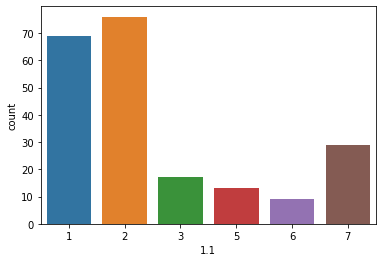

In [10]:
sns.countplot(df['1.1'],label="Count")

The plot above we can visualize that the values_counts as the glasses 2 building_windows_non_float_processed has more quantity and glass 6 tableware have less quantity. 

Will check how all the variables look with a pair plot.

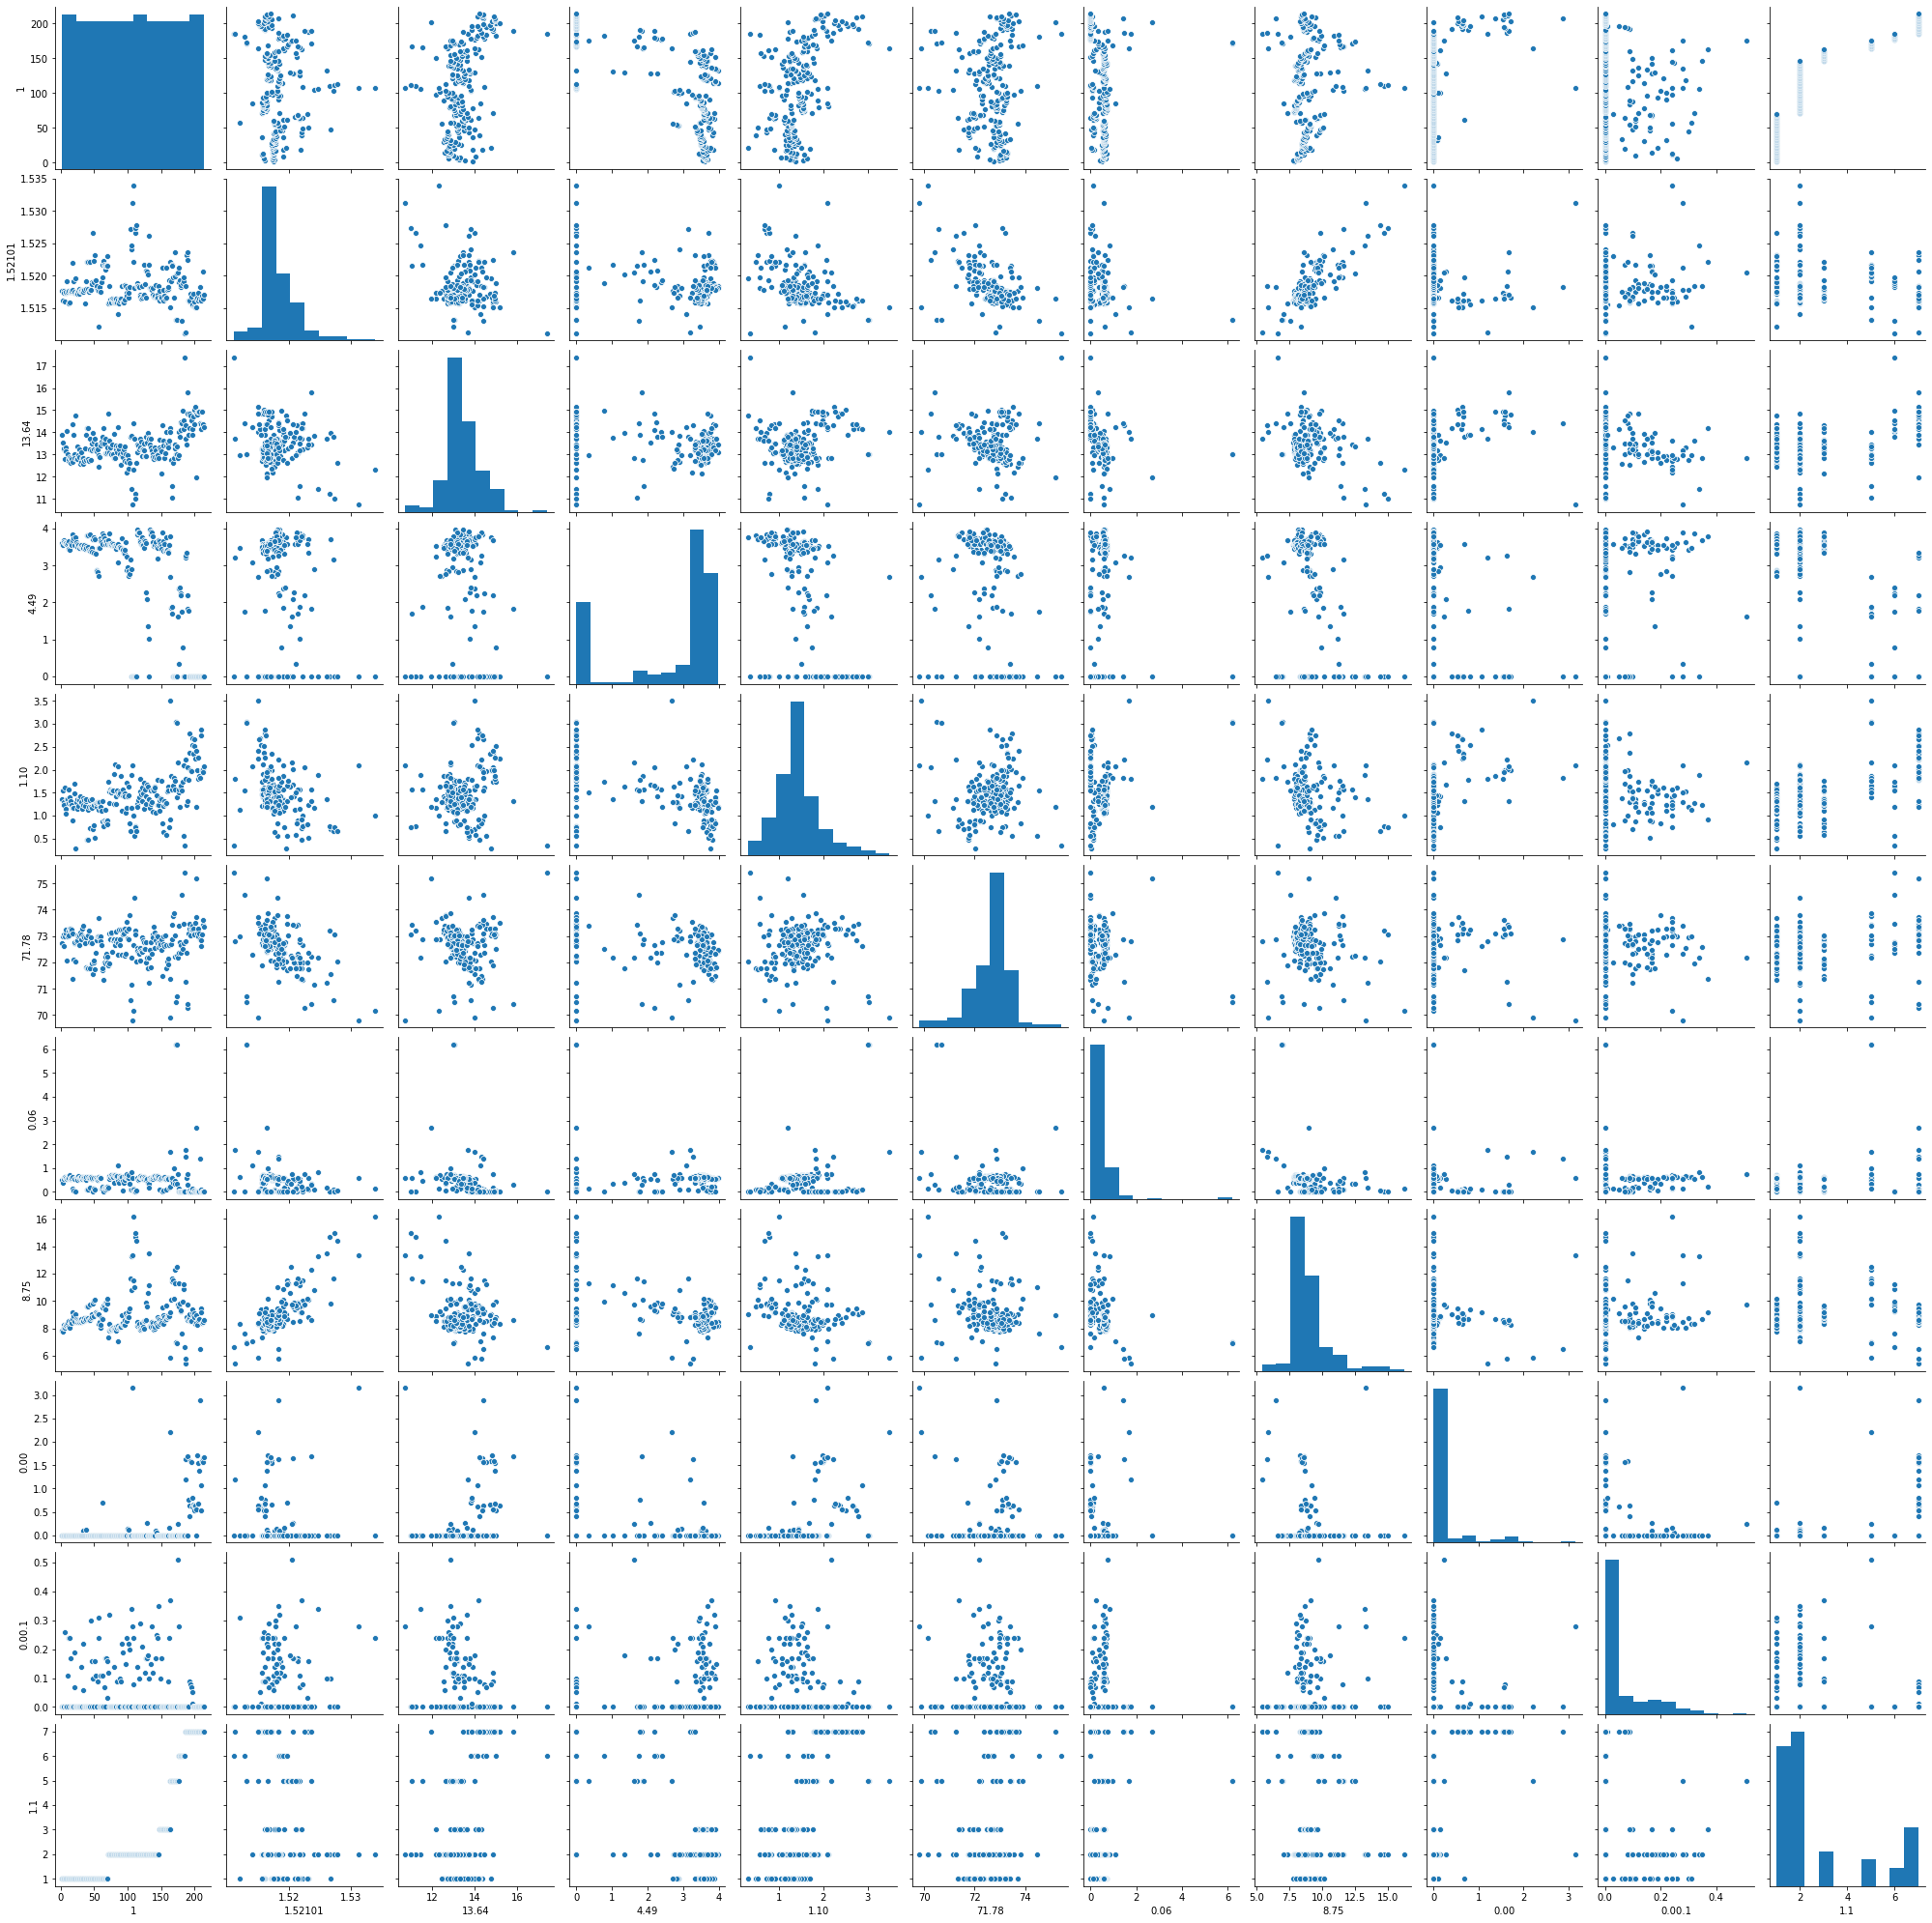

In [11]:
sns.pairplot(df)

Correlation matrix - Correlation coefficients between all the variable.

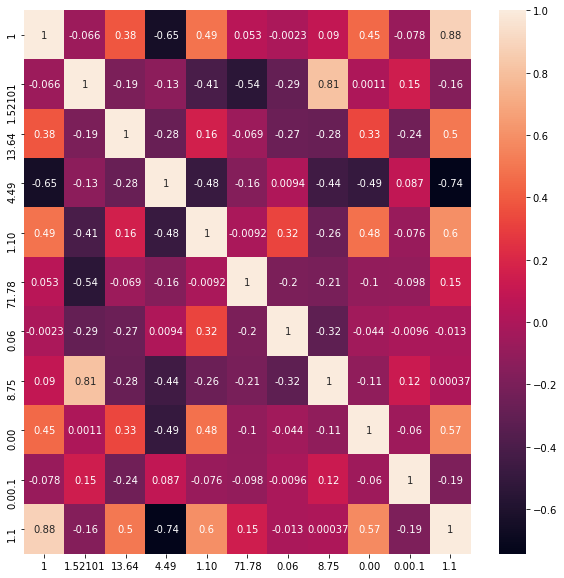

In [13]:
plt.rcParams["figure.figsize"]=10,10
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

fig = plt.show()

#### Handling Outliers

The definition of outliers by Wikipedia is “In statistics, an outlier is an observation point that is distant from other observations.” Those observations are extreme results that differ from other data observations.

One of the most important step on EDA is to find how the data is spread. We will have a look at outliers with the use of box plot visualization technique. A box plot is a visual representation of numerical data groups based on their quartiles to show how data is distributed and the outliers are plotted as single points.

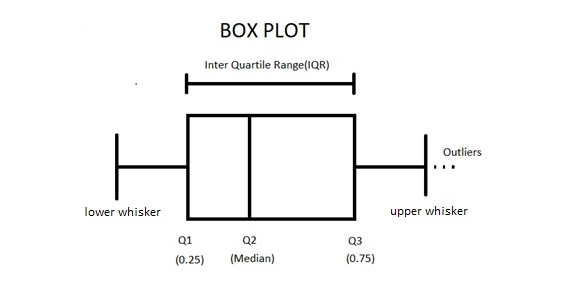

As the dimentionality of our dataset is not too big, we will plot each feature in our dataset with a box plot and if there is any outliers it will be plotted as single points in a box plot.


#### Discover outliers with Box Plot Visualization

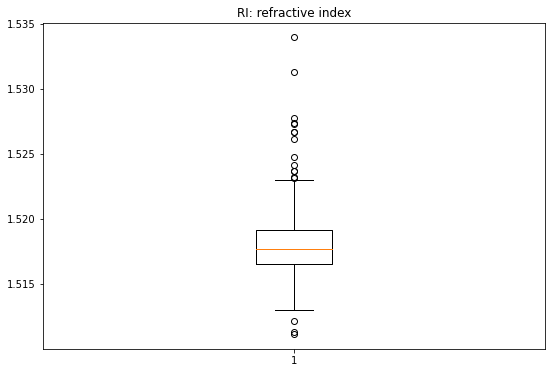

In [14]:
fig = plt.figure(figsize =(9, 6))
  
plt.boxplot(df['1.52101'])
plt.title("RI: refractive index")  
plt.show()

We can see in the plot above in the RI: refractive index 
column that there are outliers bellow 1510 and and above 1520 as those values anre not invluded in the box plot of other observations.

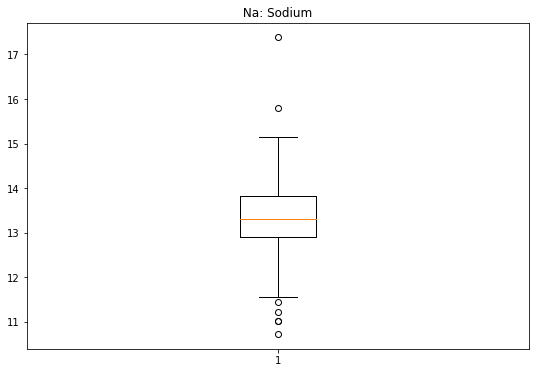

In [15]:
fig = plt.figure(figsize =(9, 6))
  
plt.boxplot(df['13.64'])
plt.title(" Na: Sodium ")  
plt.show()

Here in the Na: Sodium column there are outliers prsent at bellow 12 and above 15.

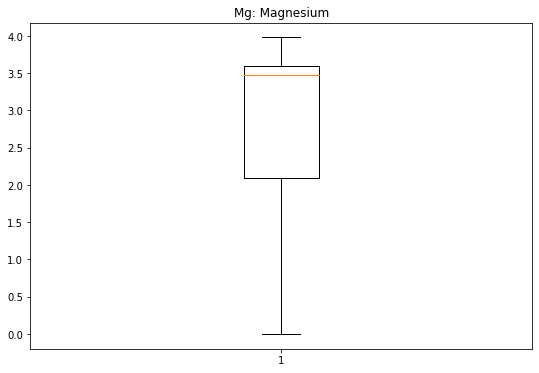

In [16]:
fig = plt.figure(figsize =(9, 6))
  
plt.boxplot(df['4.49'])
plt.title("Mg: Magnesium")  
plt.show()

In the Mg: Magnesium column there are no outliers.

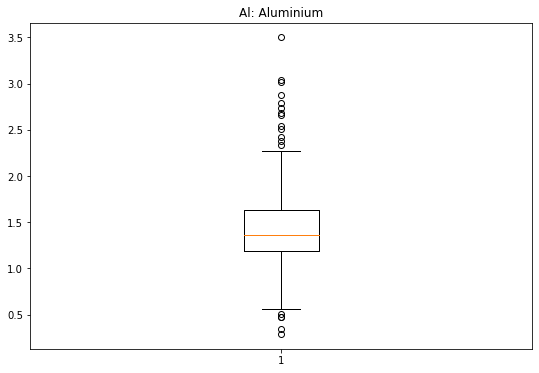

In [17]:
fig = plt.figure(figsize =(9, 6))
  
plt.boxplot(df['1.10'])
plt.title("Al: Aluminium")
plt.show()

Above Al: Aluminium plot we could see outliers above 24 and bellow approximately 0.6.

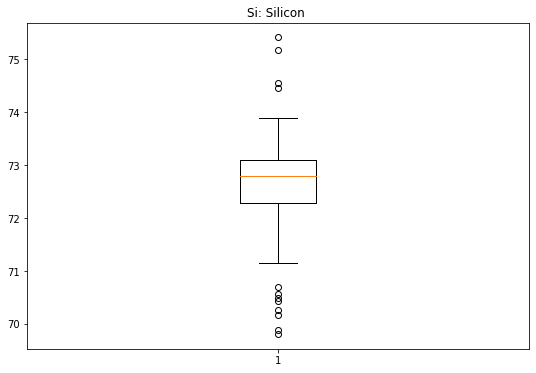

In [18]:
fig = plt.figure(figsize =(9, 6))
  
plt.boxplot(df['71.78'])
plt.title("Si: Silicon ")  
plt.show()

Here in the Si: Silicon column there are also outliers bellow 71 and above 74.

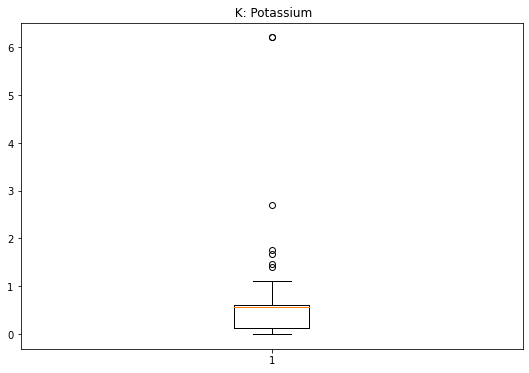

In [19]:
fig = plt.figure(figsize =(9, 6))
  
plt.boxplot(df['0.06'])
plt.title(" K: Potassium")  
plt.show()

In the K: Potassium column the outliers are present above 1.

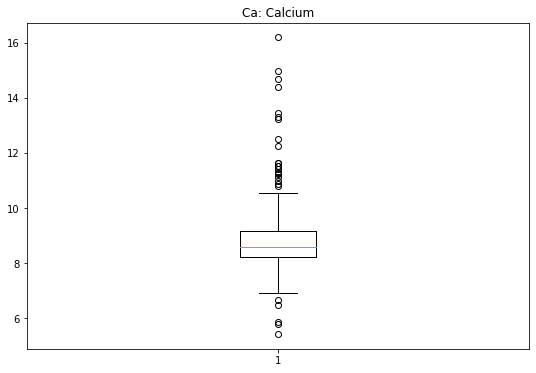

In [20]:
fig = plt.figure(figsize =(9, 6))
  
plt.boxplot(df['8.75'])
plt.title("Ca: Calcium")  
plt.show()

In the Ca: Calcium column we can see there are outlier bellow 7 and above 10.

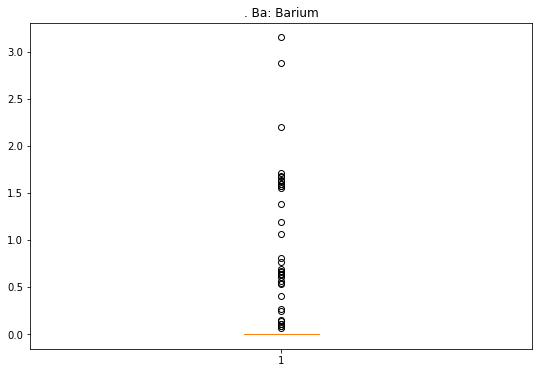

In [21]:
fig = plt.figure(figsize =(9, 6))
  
plt.boxplot(df['0.00'])
plt.title(". Ba: Barium")
plt.show()

We can see that in Ba: Barium seems like too many outliers, but I am not sure that it is all outliers. 

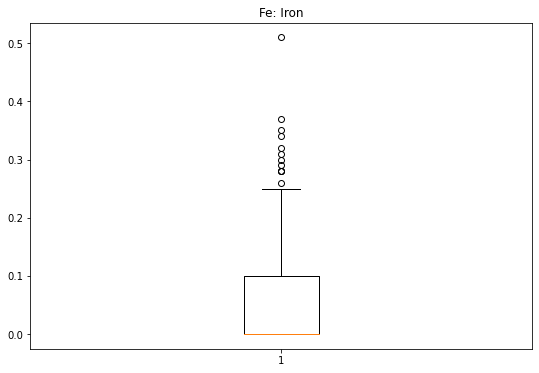

In [22]:
fig = plt.figure(figsize =(9, 6))
  
plt.boxplot(df['0.00.1'])
plt.title("Fe: Iron")  
plt.show()

For the last the Fe: Iron column we can see outliers above 0.2.

### Remove outliers

Now, that we could see how the data is spread, we will sue mathematical functions to remove the ouliers. However Box Plot uses interquartile range (IQR) to show the data distribuition, we need to utilize a mathematical formula to extract the list of detected outliers.

The definition of IQR is by Wikepedia is "In descriptive statistics, the interquartile range (IQR), also called the midspread, middle 50%, or H‑spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles,[1][2] IQR = Q3 −  Q1" (Wikipedia).

It means that the IQR is the first quartile minus the third quartile; these quartiles may be seen clearly on a box plot of the data.

Let's calculate IQR for each column.

In [23]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(Q3)

1          161.00000
1.52101      1.51915
13.64       13.83000
4.49         3.60000
1.10         1.63000
71.78       73.09000
0.06         0.61000
8.75         9.18000
0.00         0.00000
0.00.1       0.10000
1.1          3.00000
Name: 0.75, dtype: float64


To find outliers with mathematics, we'll utilize the Z-score function from the scipy package.

We will re-scale and center the data while computing the Z-score and check for data points that are too far from zero. Outliers will be defined as data points that are significantly different from zero.

In [24]:
z = np.abs(stats.zscore(df))
print(z)

[[1.72393811 0.2451006  0.59188032 ... 0.35380764 0.58830108 0.85170346]
 [1.70767455 0.71682556 0.15094587 ... 0.35380764 0.58830108 0.85170346]
 [1.69141098 0.22860672 0.24099586 ... 0.35380764 0.58830108 0.85170346]
 ...
 [1.69141098 0.75772729 1.16754474 ... 2.94550057 0.58830108 2.0051916 ]
 [1.70767455 0.60796596 1.19204109 ... 2.80467644 0.58830108 2.0051916 ]
 [1.72393811 0.4100394  1.00831841 ... 3.00585377 0.58830108 2.0051916 ]]


And then come up with a condition for identifying an outlier.

In [25]:
threshold = 3
print(np.where(z > 3))

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
       130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
       187, 188, 200, 200, 202, 206, 212], dtype=int64), array([7, 1, 2, 5, 7, 8, 1, 5, 7, 7, 7, 1, 7, 7, 9, 9, 4, 5, 8, 4, 6, 4,
       6, 9, 2, 5, 5, 8, 5, 6, 8, 8, 8], dtype=int64))


The first array provides the row numbers, while the second array contains the column numbers, indicating that z[104][7] has a Z-score greater than 3.

In [26]:
print(z[104][7])

3.00900736343217


Above we discovered outliers using Z-score, and the bellows code will remove the outliers and update to our dataframe.

In [27]:
df = df[(z < 3).all(axis=1)]

In [28]:
df.shape

(193, 11)

So, above shape of our dataset contain 193 rows, so that means that 20 rows were oultiers and were removed from our dataset.

## Prepare the data for modelling.

After have a better understaning of our dataset we start prepering for model. We will drop the ID column because it will not be relevant for our model.

In [29]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
df.head()

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


Now, we will transform our dataframe to numpy array, so we can start preperaing it accordingly to feeding into the modeling.

In [31]:
dataset = df.to_numpy()

In [32]:
dataset.shape

(193, 10)

After droped the ID column we can see we have now 213 observations and 10 columns.

In [33]:
dataset

array([[ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51766, 13.21   ,  3.69   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.51685, 14.92   ,  0.     , ...,  1.59   ,  0.     ,  7.     ],
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ]])

We will split our data into two arrays X for features and y for class: The input and output data will be divided by slicling all rows for the input variable (X) expect the column 9 and and for the output variable (y) we will selecet the column 9.

In [34]:
X = dataset[:,0:9]
y = dataset[:,9]
print(X.shape)
print(y.shape)

(193, 9)
(193,)


### Normalizing and Scaling (Numerical Variables)

Normalization is a technique for converting an array's values to a common scale without distorting variances in value ranges. It's a critical step, and removing it will reveal the difference in accuracies on our dataset. If we enter the neural network unnormalized input, the gradients will vary in various ways for each column, causing the learning to shift.

In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

We can have a look how our X features look like after being normalized.

In [36]:
X

,0,1,2,3,4,5,6,7,8
0,0.395232,0.694175,0.904523,0.413127,0.542714,0.272727,0.339463,0.000000,0.0000
1,0.305521,0.606796,0.891960,0.482625,0.608040,0.221591,0.332390,0.000000,0.0000
2,0.398369,0.529126,0.927136,0.386100,0.512563,0.323864,0.394625,0.000000,0.0000
3,0.383312,0.543689,0.909548,0.366795,0.630653,0.312500,0.373409,0.000000,0.0000
4,0.291719,0.427184,0.907035,0.513514,0.603015,0.363636,0.373409,0.000000,0.8125
...,...,...,...,...,...,...,...,...,...
188,0.319322,0.810680,0.000000,0.945946,0.572864,0.000000,0.568600,0.329268,0.0000
189,0.308657,0.754854,0.000000,1.000000,0.512563,0.045455,0.530410,0.646341,0.0000
190,0.347553,0.944175,0.000000,0.656371,0.625628,0.000000,0.420085,0.969512,0.0000
191,0.585947,0.808252,0.000000,0.667954,0.716080,0.000000,0.425743,1.000000,0.0000


### Encoding Categorical variables (Dummy Variables)

After normalizing our feature array X we will apply one hot encode on the output y. One hot encode is a method to transform interger classes into binary values. And it will create a unique binary values for each glass type.

In [37]:
ohe = OneHotEncoder()
y = ohe.fit_transform(df[['1.1']]).toarray()

The new array will have the shape (n, number of classes), with n denoting the number of samples in our dataset. In our dataset our number of classes = 6 classes. See the array bellow. 

In [38]:
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

After these steps, the data is processed and ready to be fed into the neural network.

Before fit the data into the model we will split our data into training and testing data. The data which we will train our neural network will be the training data. Then our trained neural network will be tested using the test data. This dataset is completely new to our neural network, and if it performs well on it, it indicates that there is no overfitting.

Our dataset will be divided into training and testing. Which mean that 70% of the training data will be samples, whereas 30% of the test data will be samples.

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [158]:
print('X train: ', X_train.shape, 'Y train: ', y_train.shape)
print('X test: ', X_test.shape, 'Y test: ', y_test.shape)

X train:  (135, 9) Y train:  (135, 6)
X test:  (58, 9) Y test:  (58, 6)


## Neural Network Model



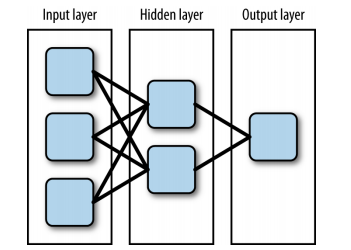

Before start our model we will have an overview about neural networks.

Neural networks are a method of mapping inputs to a broad output. In order to comprehend and make sense of inputs and events, neurons in our brains work together in a network that are able to process information. In neural networks, our brain is represented mathematically to find pattern within the data and learn from it with multiple layers of network known as neurons. 
Neural Networks are unique because it uses hidden layers of weighted function known as neurons.

The neural networks comprises five components: The input layer, the hidden layer(s), neurons, the output layer and training algorithm. 

Input layer - takes the input you are putting into the model and at this layer there are no neurons. The data in this layer like in the input layer is either symmetric or standard.

Hidden layer – in this layer is where the neurons are and thanks to hidden layers Neural networks can model nonlinear data.

Neurons - are activated weighted linear combination that have an activation function wrapped around them. The sum of the linear combination, which is a technique for combining all of the previous neurons data into a single output that the following layer can use as input. All of the work is carried out by neurons. They're a weighted sum of past inputs that's been run through an activation function that's either 0 to 1 or –1 to 1. 

Activation function - are used to normalize data among standard and symmetric problems. The main benefit of activation functions is that they serve as a mediator for incoming values at each layer. In this case, this is advantageous since neural networks have a means of detecting patterns while ignoring noise. Because of its capacity to smooth out the decision, sigmoid is the default function to utilize with neurons.

Output layer – the output layer is where the date come out from the model and different from the input layer it has neurons in it.

Training Algorithm - The weights for each neuron provided by a training algorithm. There are plenty of training algorithms: Back propagation, QuickProp and RPrp among others. Those algorithms works with the same objective of finding the best weight, for each neuron. They way that it works is, they use a set of iterations also known as epochs. In this case, a training algorithm travels across the complete neural network for each epoch and compares it to what is predicted. It is at this moment that it learns from previous errors.

Backpropagation is the primary technique by which artificial neural networks learn. It's the signal informing the neural network whether or not it predicted correctly. Backpropagate is to communicate anything in response, or to send information back upstream - in this example, to fix an error.

We will use Keras to build our model. Keras is a straightforward and high-level framework based on tensorflow for creating neural networks.

### Create the Model

When building the model we should be aware of the hidden layers, specially because the hidden layers is what makes the neural networks unique. Without the hidden layers, it would be a linear combination problem. In this case is good practice is to don’t use more than two hidden layers to attempting to reduce the chance of your data being overfitted or underfitted.  

For this neural network model we are using two hidden layers of 24 and 18 dimentions. Though we started with 12 and 8 and added more dimentions to improve accuracy score.

Sequential() passes to Keras that information that we are building the model in steps, with the output of each layer being fed into the next layer.

model.add() as we need to specify the type pf layer we want, so we use model.add() to add the layers to our neural network.

Dense is an argument that describes a fully connected layer. 

In the first layer, we have the Dense argument as output dimension that is 24, input dimensions which is 9 and the activation function as 'relu'.

In the second layer the process  is very similar, however we don’t need to specify the input dimension because we assigned the model to be sequential, so Keras will automatically taking in consideration that the input_dim will be the same of the previews layer.

In the third layer, we have the output layer, that contains the output dimension which is 6 and ativation function is sigmoid.

In [159]:
model = Sequential()
model.add(Dense(24, input_dim= 9, activation ='relu'))
model.add(Dense(18,  activation ='relu'))
model.add(Dense(6, activation ='sigmoid'))

After creating the model we need to specify the loss function and the optimizer and we can do so with compiling function in Keras.

In machine learning and optimization, cross-entropy can be used to create a loss function.

For this model loss is ‘binary_crossentropy’. 

The optimizer ‘adam’ is one the arguments required for compiling a model in Keras and it gives an optimization strategy for noisy problems with sparse gradients.

The metrics is ‘accuracy’ and it is used to describe how we wish to evaluate our neural network's performance.

### Compile the Model

In [160]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy']) 
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 24)                240       
_________________________________________________________________
dense_28 (Dense)             (None, 18)                450       
_________________________________________________________________
dense_29 (Dense)             (None, 6)                 114       
Total params: 804
Trainable params: 804
Non-trainable params: 0
_________________________________________________________________
None


### Training the Model

In keras we use model.fit() is used for training the model by calculating the weights, biases, number of layers, and so on., then we specify the input data: X_train, label data: y_train, number of epochs which the number of iteration and batch size. That will return the history of the model training, which includes the accuracy and losses of each iteration.

batch_size divides the data into batches, because sometimes the data is to big to fit the model at once. Each batch number is of samples are loaded into memory and processed. When one batch is finished, it is flushed from memory and the next batch is processed.

In [161]:
history = model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
14/14 [==============================] - 1s 2ms/step - loss: 0.7220 - accuracy: 0.0291
Epoch 2/150
14/14 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.0312
Epoch 3/150
14/14 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.0294
Epoch 4/150
14/14 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.0491
Epoch 5/150
14/14 [==============================] - 0s 3ms/step - loss: 0.6440 - accuracy: 0.0486
Epoch 6/150
14/14 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.0201
Epoch 7/150
14/14 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.0271
Epoch 8/150
14/14 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.0389
Epoch 9/150
14/14 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.0403
Epoch 10/150
14/14 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.0417
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.6387
Epoch 84/150
14/14 [==============================] - 0s 3ms/step - loss: 0.2634 - accuracy: 0.6381
Epoch 85/150
14/14 [==============================] - 0s 3ms/step - loss: 0.2626 - accuracy: 0.6475
Epoch 86/150
14/14 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.7215
Epoch 87/150
14/14 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.7106
Epoch 88/150
14/14 [==============================] - 0s 2ms/step - loss: 0.2567 - accuracy: 0.6897
Epoch 89/150
14/14 [==============================] - 0s 2ms/step - loss: 0.2668 - accuracy: 0.6711
Epoch 90/150
14/14 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.6152
Epoch 91/150
14/14 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.6889
Epoch 92/150
14/14 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.6255
Epoch 93/150


The training will take less than a minute. The neural network will be trained after 150 epochs. 

### Evaluete the Model

In [162]:
y_pred = model.predict(X_test)
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

A basic keras technique, model.predict, can be used to forecast on test data (). It will take the test data as input and return the prediction outputs.

In [163]:
a = accuracy_score(pred,test)
print('Accuracy on test model is:', a*100)

Accuracy on test model is: 74.13793103448276


The performance on the test data gave us an accuracy of 74.13.

We can utilize test data as validation data and assess the accuracy of the results after each epoch. This will provide us insight into overfitting just during training, allowing us to take action before the end of all epochs. This can be accomplished by altering the fit function bellow, so the training output will also have validation accuracy.  . 

In [164]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=150, batch_size=10)

Epoch 1/150
14/14 [==============================] - 0s 25ms/step - loss: 0.2373 - accuracy: 0.6889 - val_loss: 0.2320 - val_accuracy: 0.7241
Epoch 2/150
14/14 [==============================] - 0s 7ms/step - loss: 0.2362 - accuracy: 0.6963 - val_loss: 0.2303 - val_accuracy: 0.7414
Epoch 3/150
14/14 [==============================] - 0s 7ms/step - loss: 0.2372 - accuracy: 0.6815 - val_loss: 0.2292 - val_accuracy: 0.7241
Epoch 4/150
14/14 [==============================] - 0s 8ms/step - loss: 0.2357 - accuracy: 0.6889 - val_loss: 0.2295 - val_accuracy: 0.7414
Epoch 5/150
14/14 [==============================] - 0s 7ms/step - loss: 0.2354 - accuracy: 0.6889 - val_loss: 0.2288 - val_accuracy: 0.7414
Epoch 6/150
14/14 [==============================] - 0s 7ms/step - loss: 0.2356 - accuracy: 0.7111 - val_loss: 0.2289 - val_accuracy: 0.7414
Epoch 7/150
14/14 [==============================] - 0s 8ms/step - loss: 0.2357 - accuracy: 0.6815 - val_loss: 0.2272 - val_accuracy: 0.7241
Epoch 8/150


Epoch 59/150
14/14 [==============================] - 0s 7ms/step - loss: 0.2188 - accuracy: 0.7407 - val_loss: 0.2190 - val_accuracy: 0.7586
Epoch 60/150
14/14 [==============================] - 0s 6ms/step - loss: 0.2188 - accuracy: 0.7037 - val_loss: 0.2192 - val_accuracy: 0.7586
Epoch 61/150
14/14 [==============================] - 0s 6ms/step - loss: 0.2189 - accuracy: 0.7037 - val_loss: 0.2189 - val_accuracy: 0.7586
Epoch 62/150
14/14 [==============================] - 0s 7ms/step - loss: 0.2193 - accuracy: 0.7333 - val_loss: 0.2188 - val_accuracy: 0.7586
Epoch 63/150
14/14 [==============================] - 0s 6ms/step - loss: 0.2183 - accuracy: 0.7481 - val_loss: 0.2194 - val_accuracy: 0.7759
Epoch 64/150
14/14 [==============================] - 0s 7ms/step - loss: 0.2186 - accuracy: 0.7111 - val_loss: 0.2178 - val_accuracy: 0.7586
Epoch 65/150
14/14 [==============================] - 0s 6ms/step - loss: 0.2177 - accuracy: 0.7407 - val_loss: 0.2189 - val_accuracy: 0.7586
Epoch 

14/14 [==============================] - 0s 7ms/step - loss: 0.2072 - accuracy: 0.7481 - val_loss: 0.2150 - val_accuracy: 0.7586
Epoch 117/150
14/14 [==============================] - 0s 6ms/step - loss: 0.2063 - accuracy: 0.7259 - val_loss: 0.2126 - val_accuracy: 0.7759
Epoch 118/150
14/14 [==============================] - 0s 6ms/step - loss: 0.2064 - accuracy: 0.7111 - val_loss: 0.2130 - val_accuracy: 0.7586
Epoch 119/150
14/14 [==============================] - 0s 7ms/step - loss: 0.2084 - accuracy: 0.7556 - val_loss: 0.2174 - val_accuracy: 0.7241
Epoch 120/150
14/14 [==============================] - 0s 7ms/step - loss: 0.2053 - accuracy: 0.7481 - val_loss: 0.2134 - val_accuracy: 0.7586
Epoch 121/150
14/14 [==============================] - 0s 7ms/step - loss: 0.2056 - accuracy: 0.7185 - val_loss: 0.2132 - val_accuracy: 0.7759
Epoch 122/150
14/14 [==============================] - 0s 7ms/step - loss: 0.2049 - accuracy: 0.7333 - val_loss: 0.2136 - val_accuracy: 0.7586
Epoch 123/150

Now we can compare the accuracy on both training and test dataset.

In [165]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 

Accuracy on training data: 0.7555555701255798% 
 Error on training data: 0.24444442987442017
Accuracy on test data: 0.7586206793785095% 
 Error on test data: 0.24137932062149048


Accuracy on training data: 0.7555555701255798% 
 Error on training data: 0.24444442987442017
Accuracy on test data: 0.7586206793785095% 
 Error on test data: 0.24137932062149048

During our splitting phase, our data was divided between train with 70% of the data and test dataset with 30% of the data. 

The test is sample dataset that is unbiased and it is used to evaluate the model fit on the training dataset and it is only used after the model being trained. 

This is known as  train-test split approach. In the end it was found an accuracy of 0.7555555701255798%  and on the test data was 0.7586206793785095%. The accuracy is very similar, so that means that the prediction on the training model was 75% accurate as it is very similar to the test data as it holds the standards to compare both accuaracy.

Now we will visualize the training and validation losses and accuracies.

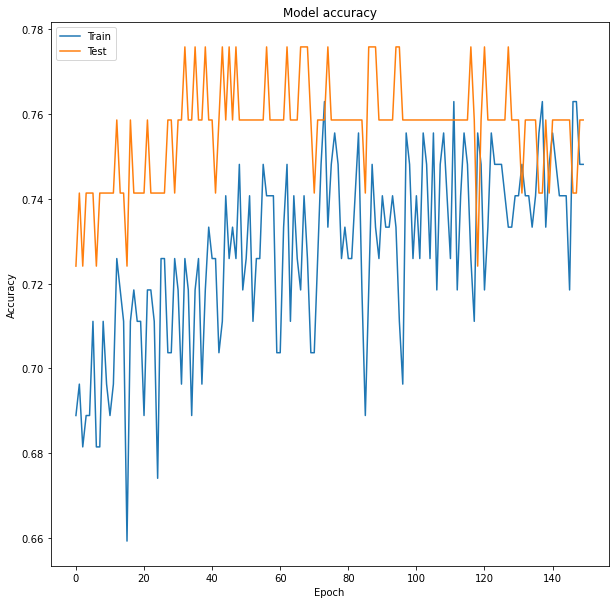

In [166]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

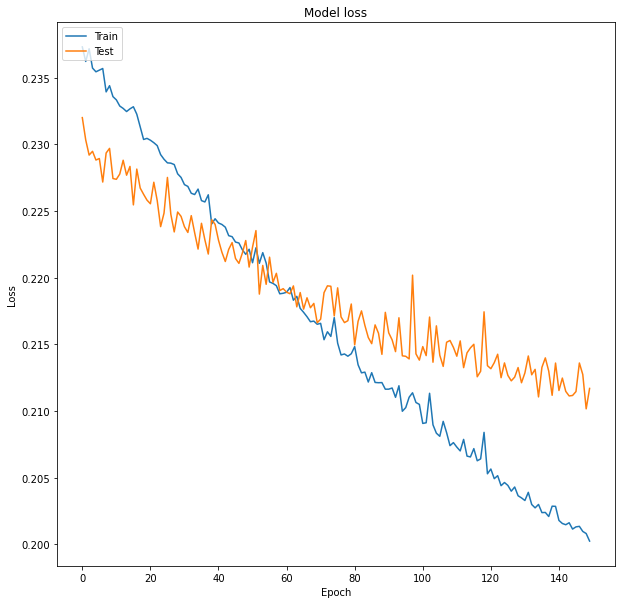

In [167]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

### Make Prediction 
      

Now we see the prediction in a dataframe.

In [131]:
sub = pd.DataFrame()
sub['Glasses'] = test
sub['Predictiction'] = pred
sub

,Glasses,Predictiction
0,0,0
1,3,3
2,0,0
3,1,1
4,0,0
5,1,1
6,0,0
7,5,5
8,1,1
9,1,1


# Conclusion 

This neural network was built, compiled, trained and evaluated in Keras to make a prediction of a type of a glass.

At first, the accuracy at this neural network was 30%. It was started with two hidden layers of 12 and 8 dimensions. Then it was added two hidden layers of 24 and 18  dimensions. To improve the accuracy, the outliers were treated and the data was normalized. 

In the end it was found an accuracy of 0.7555555701255798% on training data and 0.7586206793785095% on the test. 


# Reference

kirk, M. 2017, Thoughtful Machine Learning with Python. O’Reilly Media. CA.

Wikipedia (2021) Interquartile range. [ONLINE] Available at: <https://en.wikipedia.org/wiki/Interquartile_range'> (Accessed: 29 May 2021).

A.I Wiki (2020), A Beginner's Guide to Backpropagation in Neural Networks. [ONLINE] Available at: <https://wiki.pathmind.com/backpropagation'> (Accessed: 29 May 2021).